## Определение перспективного тарифа для телеком компании

### Шаг 1. Импорт библиотек и получение первичной информации

In [1]:
import pandas as pd #импортирую библиотеку pandas для работы работы с датасетами
import matplotlib.pyplot as plt #импортирую библиотеку matplotlib для дальнейшей работы с  графиками
import numpy as np #импортирую библиотеку numpy для работы с математическими функциями
from scipy import stats as st #импортирую метод stats для работы со статистическими вычислениями
from math import factorial #импортирую метод factorial для дальнейших вычислений факториала

In [2]:
#прочитаем все данные нам датасеты и поместим их в переменные 
calls = pd.read_csv('/datasets/calls.csv') #переменная для датасета с информацией о звонках
internet = pd.read_csv('/datasets/internet.csv') #переменная для датасета с информацией об интернет-сессиях
messages = pd.read_csv('/datasets/messages.csv') #переменная для датасета с информацией о сообщениях
tariffs = pd.read_csv('/datasets/tariffs.csv', index_col = 'tariff_name') #переменная для датасета с информацией о тарифах
users = pd.read_csv('/datasets/users.csv') #переменная для датасета с информацией о пользователях

In [3]:
#получим базовое представление о датасете calls
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
#выведем первые 20 строчек датасета calls
calls.head(20)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [5]:
#каждый столбец датафрейма cells проверим на наличие и количество уникальных значений
#calls['id'].value_counts() - все нормально
#calls['call_date'].value_counts() - все нормально
#calls['duration'].value_counts() - есть много (39613) уникальных значений равных нулю
#calls['user_id'].value_counts() - все нормальное

In [6]:
#получим базовое представление о датасете internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [7]:
#выведем первые 20 строчек датасета
internet.head(20)
#упс, обнаружился какой-то дополнительный столбец unnamed: 0, о котором нигде не указано; скорее всего, лишний столбец, от которого необходимо избавиться

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [8]:
#каждый столбец датафрейма internet проверим на наличие и количество уникальных значений
#internet['id'].value_counts() - все нормально
#internet['mb_used'].value_counts() - много уникальных значений (19598) равных нулю
#internet['session_date'].value_counts() - все нормально
#internet['user_id'].value_counts() - все нормально

In [9]:
#получим базовое представление о датасете messages
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [10]:
#выведем первые 20 строчек датасета messages
messages.head(20)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [11]:
#каждый столбец датафрейма 'messages' проверим на наличие и количество уникальных значений
#messages['id'].value_counts() - все нормально
#messages['message_date'].value_counts() - все нормально
#messages['user_id'].value_counts() - все нормально

In [12]:
##получим базовое представление о датасете tariffs
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, smart to ultra
Data columns (total 7 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
dtypes: int64(7)
memory usage: 128.0+ bytes


In [13]:
#выведем первые 20 строчек датасета
tariffs.head(20)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
tariff_name,,,,,,,
smart,50,15360,500,550,200,3,3
ultra,1000,30720,3000,1950,150,1,1


In [14]:
#каждый столбец датасета tariffs проверим на наличие и количество уникальных значений
#tariffs['messages_included'].value_counts() - все нормально
#tariffs['mb_per_month_included'].value_counts() - все нормально
#tariffs['minutes_included'].value_counts() - все нормально
#tariffs['rub_monthly_fee'].value_counts() - все нормально
#tariffs['rub_per_gb'].value_counts() - все нормально
#tariffs['rub_per_message'].value_counts() - все нормально
#tariffs['rub_per_minute'].value_counts() - все нормально
#tariffs['tariff_name'].value_counts() - все нормально

In [15]:
#получим базовое представление о датасете users
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [16]:
#выведем первые 20 строчек датасета users
users.head(20)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [17]:
#каждый столбец датасета users проверим на наличие и количество уникальных значений
#users['user_id'].value_counts() - все нормально
#users['age'].value_counts() - все нормально
#users['churn_date'].value_counts() - пропущенные значения
#users['city'].value_counts() - все нормально
#users['first_name'].value_counts() - все нормально
#users['last_name'].value_counts() - все нормально
#users['reg_date'].value_counts() - все нормально
#users['tariff'].value_counts() - все нормально

### Вывод

##### До начала работы с датасетами были произведены следующие действия:
1. Импортированы библиотеки pandas, matplotlib и numpy для работы с датасетами, графиками и математическими функциями (соответственно);
2. Импортированы методы stats и factorial для работы со статистическими вычислениями и факториалом (соответственно).

##### Предварительная работа с датасетами:
1. Для каждого датасета были созданы соответствующие переменные: calls, internet, messages, tariffs и users;
2. Для каждого датасета были получены первичные представления о данных (наименование столбцов, количество столбцов, элементов, тип данных) методом df.info() и выведены первые 20 строчек методом df.head(20);
3. Для каждого столбца каждого датасета были произведены обнаружение и подсчет уникальных значений методом df.value_counts().

#### Датасет calls
###### Количество элементов: 202607; количество столбцов: 4; тип данных: float, int, object.

###### Наименования столбцов датасета, их содержимое и обнаруженные проблемы при анализе:

'id' - уникальный номер звонка - все нормально;
'call_date' - дата звонка - все нормально;
'duration' - продолжительность звонка - уникальные значения равные нулю (39613);
'user_id' - идентификатор пользователя, сделавшего звонок.

#### Датасет internet
###### Количество элементов: 149396; количество столбцов: 5; тип данных: float, int, object

###### Наименования столбцов датасета, их содержимое и обнаруженные проблемы при анализе:

'id' - уникальный номер сессии - все нормально;
'mb_used' - объем потраченного трафика за интернет-сессию - уникальные значения равные нулю (19598);
'session_date' - дата интернет-сессии;
'user_id' - идентификатор пользователя - все нормально.

Также обнаружился дополнительный столбец 'Unnamed', который не содержит никаких полезные данных, скорее всего, просто ошибка датасета и от него необходимо избавиться.

#### Датасет messages 
###### Количество элементов: 123036; количество столбцов: 3; тип данных: int, object .

###### Наименования столбцов датасета, их содержимое и обнаруженные проблемы при анализе:

'id' - уникальный номер сообщения - все нормально;
'message_date' - дата сообщения - все нормально;
'user_id' - идентификатор пользователя, отправившего сообщение.

#### Датасет tariffs
###### Количество элементов: 2; количество столбцов: 8; тип данных: int, object.

###### Наименования столбцов датасета, их содержимое и обнаруженные проблемы при анализе:

'messages_included' - количество сообщений в месяц, включенных в абонентсткую плату - все нормально;
'mb_per_month_included' - объем интернет трафика, включенного в абонентскую плату - все нормально;
'minutes_included' - количество минут разговора в месяц, включенных в абонентскую плату - все нормально;
'rub_monthly_fee' - ежемесячная абонентская плата в рублях - все нормально;
'rub_per_gb' - стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета - все нормально;
'rub_per_message' - стоимость отправки сообщения сверх тарифного пакета - все нормально;
'rub_per_minute' - стоимость минуты разговора сверх тарифного пакета - все нормально;
'tariff_name' - название тарифа - все нормально.

#### Датасет users
###### Количество элементов: 500 ; количество столбцов: 8 ; тип данных: int, object.

###### Наименования столбцов датасета, их содержимое и обнаруженные проблемы при анализе:

'user_id' - уникальный идентификатор пользователя - все нормально;
'age' - возраст пользователя - все нормально - все нормально;
'churn_date' - дата прекращения пользования тарифом - пропущенные значения;
'city' - город проживания пользователя - все нормально;
'first_name' - имя пользователя - все нормально;
'last_name' - фамилия пользователя - все нормально;
'reg_date' - дата подключения тарифа - все нормально;
'tariff' - название тарифного плана - все нормально.

##### Предположения о появлении пропусков и их заполнению:
1. Большое количество нулевых значений в столбце 'duration' датасета calls возникли, скорее всего, из-за некорректного округления значений в большую сторону. Как было сказано в условиях задачи: "Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута." - на этом этапе и произошла ошибка. Их нулевые значения можно будет заменить на 1;
2. Большое количество нулевых значений в столбце 'mb_used' датасета internet может быть обусловлено те, что некоторые люди попросту не используют интернет на своих устройствах. 
3. Пропуски в столбце 'churn_date' датасета 'users' возникли из-за того, что тариф еще действовал на момент выгрузки данных. Можно, например, все пропущенные значения заполнить максимальным значением столбца для каждого тарифного плана. Это будет вполне объективно и подходяще. 

##### На этапе предобработки необходимо:
1. Определить суммарное количество пропущенных значений во всех датасетах;
2. Заполнить пропуски в столбцах с пропущенными значениями;
3. Удалить лишний столбец 'Unnamed: 0' в датасете internet; 
4. Значения столбца 'call_date' датасета calls - значения столбца 'session_date' датасета internet - значения столбца 'message_date' датасета messages - значения столбцов 'churn_date' и 'reg_date' датасета users привести к типу datetime;
5. Значения столбцов 'duration' и 'mb_used', и 'mb_per_month_included' датасетов calls и internet (соответственно) необходимо будет заранее округлить в большую сторону, а их значения привести к целочисленному типу. Также переведем значения из мегабайтов в гигабайты;
6. Определить наличие и количество дубликатов;
7. Для каждого пользователя рассчитать: количество сделанных звонков и израсходованных минут по месяцам; количество отправленных сообщений по месяцам; объем израсходованного трафика по месяцам; помесячную выручку.

##### На этапе исследовательского анализа данных необходимо:
1. Описать, сколько минут разговора, сообщений и интернет-трафика требуется пользователям каждого тарифного плана в месяц;
2. Посчитать среднее, дисперсию и стандартное отклонение;
3. Построить гистограммы и описать распределения.

##### На этапе проверки гипотез необходимо:
1. Проверить гипотезу "средняя выручка пользователей тарифов «Ультра» и «Смарт» различается";
2. Проверить гипотезу "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов";
3. Объяснить, как были сформулированы нулевая и альтернативная гипотезы, и с помощью каких критериев они были проверены.


### Шаг 2. Предобработка данных

### Обработка пропущенных значений

In [18]:
#определим суммарное количество пропущенных значений во всех датасетах
calls.isna().sum() #- пропущенных значений в датасете calls не обнаружено
internet.isna().sum() #- пропущенных значений в датасете internet не обнаружено
messages.isna().sum() #- пропущенных значений в датасете messages не обнаружено
tariffs.isna().sum() #- пропущенных значений в датасете tariffs не обнаружено
users.isna().sum() #- в столбце 'churn_date' обнаружено 462 пропущенных значения

#значения столбца 'churn_date' датасета users сразу приведем к типу datetime, чтобы получить возможность избавиться от пропусков
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y.%m.%dT%H:%M:%S') #churn_date

#теперь пропущенные значения 'churn_date' можно заменить максимальным значением
churn_date_max = users['churn_date'].max() #максимальное значение столбца
users['churn_date'] = users['churn_date'].fillna(churn_date_max) #заменяем пропущенные значения на максимальное методом df.fillna()

#удаляю лишний столбец 'Unnamed: 0' в датасете internet
del internet['Unnamed: 0']

users.isna().sum() #еще раз проверим пропуски в датасете users

user_id       0
age           0
churn_date    0
city          0
first_name    0
last_name     0
reg_date      0
tariff        0
dtype: int64

#### Вывод

##### Что было сделано:
1. Методом df.isna().sum() были определены и подсчитаны пропущенные значения в датасетах calls, internet, messages, tariffs и users (соответственно);
2. Значения столбца 'churn_date' датасета users были заранее приведены к типу date, чтобы стало возможным обработать пропущенные значения;
3. Пропущенные значения в 'churn_date' были заменены максимальным максимальным значением столбца;
4. Удален лишний столбец 'Unnamed: 0' в датасете internet.

Решение заменить пропуски максимальным значение было принято исходя из факта, что нам известно: пропущенные значения = пользователь еще использовал тариф на момент выгрузки данных. Данное решение я посчитал вполне подходящим для ситуации.

##### После выполнения всех пунктов пропущенных значений ни в одном из датасетов не осталось.

### Изменение типов данных

In [19]:
#приведем значения столбцов 'call_date' calls, 'session_date' internet, 'message_date' messages и 'reg_date' users к значениям типа datetime
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y.%m.%dT%H:%M:%S') #call_date
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y.%m.%dT%H:%M:%S') #session_date
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y.%m.%dT%H:%M:%S') #message_date
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y.%m.%dT%H:%M:%S') #reg_date

#в датафрейм calls добавим столбцец с информацией о месяцах совершенных звонков
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

#в датафрейм messages добавим столбец с информацией о месяцах отправленных сообщений
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

#в датафрейм internet добавим столбец с информацией о месяцах израсходованного интернет-трафика
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

#значения столбцов 'duration' и 'mb_used' датасетов calls и internet округлим в
#большую сторону и приведем к целочисленному типу; также значения столбца 'mb_used' и 'mb_per_month_included' переведем в гигабайты.
calls['duration'] = calls['duration'].apply(np.ceil).astype('int') #duration
internet['mb_used'] = (internet['mb_used'] / 1024).apply(np.ceil).astype('int') #mb_used
tariffs['mb_per_month_included'] = (tariffs['mb_per_month_included'] / 1024).apply(np.ceil).astype('int')

### Вывод

#### Что было сделано:
1. Значения столбцов call_date' calls, 'session_date' internet, 'message_date' messages и 'reg_date' users были приведены к типу datetime;
2. В датафреймы calls, messages и internet были добавлен столбцы 'month', содержащие информацию о месяцах совершения звонков, месяцах отправленных сообщений и объеме израсходованного интернет-трафика за месяцы для каждого пользователя (соответственно);
3. Значения столбцов 'duration' и 'mb_used' датасетов calls и internet были округлены в большую сторону и приведены к целочисленным значениям для удобства вычисления; также мегабайты в столбце 'mb_used' и 'mb_per_month_included' были переведены в гигабайты.

##### Были изменены и добавлены все необходимые данные.

### Проверка дубликатов

In [20]:
#проверим наличие и количество дубликатов в наших датасетах
calls.duplicated().sum() #дубликатов в датасете calls не обнаружено
internet.duplicated().sum() #дубликатов в датасете internet не обнаружено
messages.duplicated().sum() #дубликатов в датасете messages не обнаружено
tariffs.duplicated().sum() #дубликатов в дататасете tariffs не обнаружено
users.duplicated().sum() #дубликатов в датасете users не обнаружено

0

### Вывод

##### Дубликатов в датасетах calls, internet, messages, tariffs, users обнаружено не было

### Подсчет значений данных для пользователя

In [21]:
#создаем отдельную табличку с данным о количестве звонков и израсходованных минутах по месяцям для каждого пользователя
calls_for_months = calls.groupby(['user_id', 'month']).agg({'duration' : ['count', 'sum']}).reset_index() 

#создаем отдельную табличку с данными о количестве отправленных сообщений по месяцам для каждого пользователя
messages_for_months = messages.groupby(['user_id', 'month']).agg({'id' : 'count'}).reset_index()

#создаем отдельную табличку с данными об объеме израсходованного интернет-трафика по месяцам для каждого пользователя
internet_for_months = internet.groupby(['user_id', 'month']).agg({'mb_used' : 'sum'}).reset_index()

#сделаем общую таблицу с информацией о затратах для каждого пользователя, а также наименовании города
new_table = calls_for_months.merge(messages_for_months, how = 'outer', on = ['user_id', 'month']).merge(internet_for_months, how = 'outer', on = ['user_id', 'month']).merge(users[['user_id', 'tariff', 'city']], how = 'left', on = 'user_id')
#удалим образовавшиеся дубли столбцов
new_table = new_table.drop(new_table.columns[[2, 3]], axis='columns')

/opt/conda/lib/python3.7/site-packages/pandas/core/reshape/merge.py:617: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [22]:
#изменим названия столбцов в объединенной таблице и выведем таблицу
new_table.columns = ['user_id', 'month', 'calls_count', 'calls_duration', 'messages_sent', 'internet_mb_used', 'tariff', 'city']
new_table
#ого, образовались пропущенные значения

,user_id,month,calls_count,calls_duration,messages_sent,internet_mb_used,tariff,city
0,1000,5,22.0,159.0,22.0,4.0,ultra,Краснодар
1,1000,6,43.0,172.0,60.0,49.0,ultra,Краснодар
2,1000,7,47.0,340.0,75.0,28.0,ultra,Краснодар
3,1000,8,52.0,408.0,81.0,27.0,ultra,Краснодар
4,1000,9,58.0,466.0,57.0,26.0,ultra,Краснодар
...,...,...,...,...,...,...,...,...
3209,1489,9,NaN,NaN,32.0,50.0,smart,Санкт-Петербург
3210,1489,10,NaN,NaN,21.0,52.0,smart,Санкт-Петербург
3211,1489,11,NaN,NaN,20.0,46.0,smart,Санкт-Петербург
3212,1489,12,NaN,NaN,35.0,45.0,smart,Санкт-Петербург


In [23]:
new_table.isna().sum() #проверим количество пропущенных значений в таблице
new_table = new_table.fillna(0) #заменим их на нули
new_table #проверим еще раз

,user_id,month,calls_count,calls_duration,messages_sent,internet_mb_used,tariff,city
0,1000,5,22.0,159.0,22.0,4.0,ultra,Краснодар
1,1000,6,43.0,172.0,60.0,49.0,ultra,Краснодар
2,1000,7,47.0,340.0,75.0,28.0,ultra,Краснодар
3,1000,8,52.0,408.0,81.0,27.0,ultra,Краснодар
4,1000,9,58.0,466.0,57.0,26.0,ultra,Краснодар
...,...,...,...,...,...,...,...,...
3209,1489,9,0.0,0.0,32.0,50.0,smart,Санкт-Петербург
3210,1489,10,0.0,0.0,21.0,52.0,smart,Санкт-Петербург
3211,1489,11,0.0,0.0,20.0,46.0,smart,Санкт-Петербург
3212,1489,12,0.0,0.0,35.0,45.0,smart,Санкт-Петербург


In [24]:
#напишем функцию для подсчета выручки с каждого пользователя
def users_benefits(row, tariffs = tariffs): #на вход устанавливаем строку и обращаемся к таблице tariffs
    #создаем переменные с данными о продолжительности звонков, количестве сообщений, объеме израсходованного трафика и названии тарифа
    short_min = row['calls_duration']
    short_message = row['messages_sent']
    short_internet = row['internet_mb_used']
    tariff = row['tariff']
   
    #создаем переменные с данными о лимите звонков, сообщений и интернет-трафике в соответствии с тарифом
    minutes_lim = tariffs.loc[tariff, 'minutes_included']
    mess_lim = tariffs.loc[tariff, 'messages_included']
    inter_lim = tariffs.loc[tariff, 'mb_per_month_included']
   
    #посчитаем переплату по тарифному плану для каждой категории
    call_overlimit = max(short_min - minutes_lim, 0)
    call_overpay = call_overlimit * tariffs.loc[tariff, 'rub_per_minute']
   
    messages_overlimit = max(short_message - mess_lim, 0)
    messages_overpay = messages_overlimit * tariffs.loc[tariff, 'rub_per_message']
   
    internet_overlimit = max(short_internet - inter_lim, 0)
    internet_overpay = internet_overlimit * tariffs.loc[tariff, 'rub_per_gb']
   
    #подсчитаем выручку с каждого пользователя                      
    profit = call_overpay + messages_overpay + internet_overpay + tariffs.loc[tariff, 'rub_monthly_fee']
    return profit
   
#создаю новый столбец 'profit' в таблице new_table с данными о выручке с каждого пользователя
new_table['profit'] = new_table[['tariff', 'calls_duration', 'internet_mb_used', 'messages_sent']].apply(users_benefits, axis = 1)

### Вывод

##### Что было сделано:
1. Созданы новые датафреймы calls_for_month, messages_for_months и internet_for_months с данными о количестве звонков, количестве отправленных сообщений и об объеме израсходованного интернет-трафика для каждого пользователя по месяцам;
2. Создана таблица new_table с информацией о суммарных затратах для каждого пользователя;
3. Удалены дубли столбцов, образовавшиеся после объединения таблиц;
4. Проверено и подсчитано количество пропущенных значений; произведена их замена;
5. Написана общая функция для подсчета выручки с каждого пользователя.

### Вывод

#### На этапе предобработки произведена следующая работа:
1. Определены, подсчитаны и исправлены все пропущенные значения во всех таблицах, как в первоначальных, так и новообразовавшейся new_table;
2. Удален лишний столбец 'Unnamed: 0' в датасете internet, а также дубли столбцов в датасете new_table;
3. Необходимые столбцы в датасетах приведены к типу datetime;
4. В датасеты calls, messages, internet были добавлены столбцы 'month' с информацией о месяцах;
5. Значения столбцов 'duration' и 'mb_used' датасетов calls и internet округлены в большую сторону и приведены к целочисленному типу;
6. Произведена проверка дубликатов во всех датасетах;
7. Созданы новые датафреймы calls_for_month, messages_for_months и internet_for_months с данными о количестве звонков, количестве отправленных сообщений и об объеме израсходованного интернет-трафика для каждого пользователя по месяцам;
8. Подсчитана выручка с каждого пользователя тарифных планов.

### Шаг 3. Анализ данных

In [25]:
#считаю среднее количество, дисперсию и стандартное отклонение для минут разговора, сообщений и объема интернет-трафика
new_table_pivot = new_table.pivot_table(columns = 'tariff', values = ['calls_count', 'calls_duration', 'messages_sent', 'internet_mb_used'], aggfunc = ['mean', lambda x: np.var(x, ddof=0), np.std])
new_table_pivot.columns= ['mean_smart', 'mean_ultra', 'variance_smart', 'variance_ultra', 'std_smart', 'std_ultra']
new_table_pivot

,mean_smart,mean_ultra,variance_smart,variance_ultra,std_smart,std_ultra
calls_count,58.463437,73.392893,672.574370,1926.731929,25.939858,43.916853
calls_duration,417.934948,526.623350,36203.066652,100771.223617,190.313730,317.606098
internet_mb_used,42.418125,38.164467,223.196190,382.387164,14.943104,19.564656
messages_sent,33.384029,49.363452,796.455483,2282.946075,28.227876,47.804457


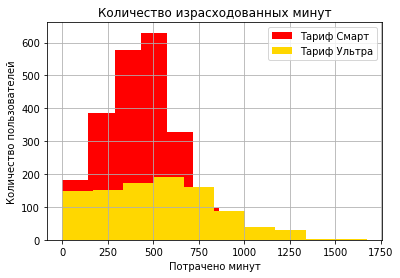

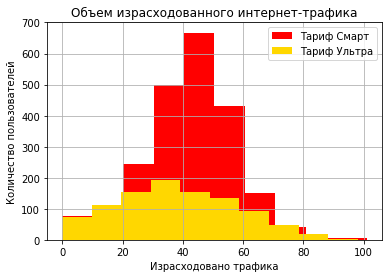

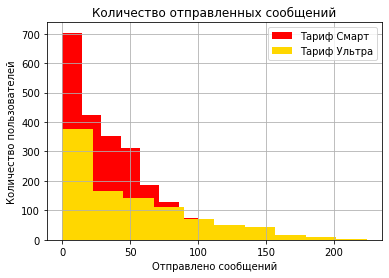

In [26]:
#построю гистограммы для распределений

#создаю словарь для построения графиков
dict_for_hist = {'calls_duration' : ['Количество израсходованных минут', 'Потрачено минут'],
                 'internet_mb_used' : ['Объем израсходованного интернет-трафика', 'Израсходовано трафика'],
                 'messages_sent' : ['Количество отправленных сообщений', 'Отправлено сообщений']}

#цикл для построения графиков
for column in dict_for_hist.keys():
    plt.hist(new_table.query('tariff == "smart"')[column], label='Тариф Смарт', color = 'red')
    plt.hist(new_table.query('tariff == "ultra"')[column], label='Тариф Ультра', color = 'gold')
    plt.xlabel(dict_for_hist[column][1])
    plt.ylabel('Количество пользователей')
    plt.title(dict_for_hist[column][0])
    plt.grid(True)
    plt.legend()
    plt.show()   

### Вывод

#### Что было сделано:
1. Посчитано среднее арифметическое, дисперсия и стандартное отклонение для количество израсходованных минут, отправленных сообщений и объема израсходованного трафика в соответствии с каждым тарифным планом; для этого был использован метод сводных таблиц;
2. Для каждого из распределений были построены соответствующие гисторграммы. Для этого был создан словарь с названиями столбцов; написан цикл, который производит автоматическую постройку необходимых графиков с определенными параметрами (решетка, цвет графиков).

#### Среднее, дисперсия и стандартное отклонение тарифа "Смарт".
1. Среднее значение для столбцов (далее обозначены как 'тех же') 'calls_count' - 58, 'calls_duration' - 418', 'internet_mb_used' - 40', 'messages_sent' - 33;
2. Дисперсия для тех же - 672 - 36203 - 223 - 796;
3. Стандартное отклонение для тех же - 25 - 190 - 14 - 28.

#### Среднее, дисперсия и стандартное отклонение тарифа "Ультра".
1. Среднее значение для столбцов (далее обозначены как 'тех же') 'calls_count' - 73, 'calls_duration' - 527, 'internet_mb_used' - 35, 'messages_sent' - 49;
2. Дисперсия для тех же - 1926 - 100771 - 382 - 2282;
3. Стандартное отклонение для тех же - 44 - 318 - 39 - 48.

### Описание распределений  на основании графиков

#### График "Количество израсходованных минут"
1. Из графика следует, что тарифом "Смарт" пользуется большее количество пользователей, чем тарифом "Ультра".
2. На первый взгляд может показаться, что пользователи обоих тарифов расходуют практически одинаковое количество минут, но нет. Если основной расход минут на тарифе "Смарт" сосредоточен в промежутке от 150 до 700 минут, с последующим спадом, то расход минут на тарифе "Ультра" распределен более равномерно на промежутке от 0 до 1300 минут, с последующим спадом значений;
3. Пользователи тарифа "Смарт" чаще остальных превышают установленный тарифным планом лимит.

#### Такие показатели могут свидетельствовать о том, что, во-первых: тарифом "Смарт" пользуется больше людей; во-вторых: пользователи тарифа "Смарт" чаще совершают перерасход лимита минут, что приводит к необходимости дополнительных затрат на обслуживание, а вот пользователи тарифа "Ультра" вообще не превышают лимит своего тарифного плана.

#### График "Объем израсходованного интернет-трафика"


1. Как уже было установлено, тарифом "Смарт" пользуются больше людей;
2. Основной объем израсходованного трафика на тарифе "Смарт" находится в диапазоне от 8 тыс.мб до 25 тыс.мб, а на тарифе "Ультра" от 5 тыс.мб до 35 тыс.мб. 
3. Данные тарифа "Ультра" распределены равномернее тарифа "Смарт';
4. Пользователи тарифа "Смарт" чаще превышают установленный тарифным планом лимит.

#### Такие показатели могут свидетельствовать о том, что, во первых: тарифом "Смарт" пользуется больше людей; во-вторых: пользователи тарифа "Смарт" чаше превышают лимит тарифного плана. Пользователи тарифа "Ультра" тоже превышают лимит, но не так часто, что может говорить о том, что им достаточного лимитного объема трафика

#### График "Количество отправленных сообщений"

1. Тарифом "Смарт" бользуется больше людей;
2. Есть пики около нуля у обеих тарифов, что может говорить о том, пользователи тарифов вообще не отправляют смс-сообщения;
3. Пользователи тарифа "Смарт" превышают установленный лимит, в то время, как пользователи тарифа "Ультра" едва ли пользуют 25% установленного лимита.

#### Такие показатели свидетельствуют о том, что тарифом "Смарт" вновь пользуется больше людей, а также то, что пользователи тарифа "Смарт" чаше других превышают установленный лимит тарифа.

#### Итог по графикам можно подвести следующий:
1. Пользователей тарифного плана "Смарт" больше, чем пользователей тарифа "Ультра";
2. Пользователи тарифного плана "Смарт" чаще превышает установленный лимит на услуги звонков, смс и интернета;
3. Раз они чаще превышают лимит, то, следовательно, чаще и больше переплачивают, чем приносят выручку компании;
4. Тарифный план "Ультра", хоть и стоит дороже, но более комфортен для пользователей;

#### Сделаю предположение: тарифный план "Смарт" для компании выгоднее, чем тарифный план "Ультра".

### Шаг 4. Проверка гипотез


In [27]:
#создаю отдельные фреймы с выручкой пользователей для каждого тарифного плана
profit_smart = new_table[new_table['tariff'] == 'smart']['profit'] #значение выручки для пользователей тарифа 'Смарт'
profit_ultra = new_table[new_table['tariff'] == 'ultra']['profit']#значение выручки для пользователей тарифа 'Ультра'

In [28]:
#проверим гипотезу "средняя выручка пользователей тарифов «Ультра» и «Смарт» различается"

#h0 - средняя выручка пользователей тарифов "Ультра" и "Смарт" не различается
#h1 - средняя выручка пользователей тарифов "Ультра" и "Смарт" различается

alpha = .05  #критический уровень статистической значимости 

results = st.ttest_ind(profit_smart, profit_ultra, equal_var = False)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  3.366123216919074e-132
Отвергаем нулевую гипотезу


In [29]:
#создаю отдельные фреймы с выручкой пользователей для каждого тарифного плана для Москвы, Санкт-Петербурга и регионов

#для этого произведем категоризацию столбца 'city' датафрейма users отделив Москву от регионов
def category(city):
    if 'Москва' in city:
        return 'Москва'
    return 'Регион'


new_table['city_category'] = new_table['city'].apply(category)

profit_msc = new_table[new_table['city_category'] == 'Москва']['profit']
profit_reg = new_table[new_table['city_category'] == 'Регион']['profit']

In [30]:
#првоерим гипотезу "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"

#h0 - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
#h1 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

alpha = .05

results = st.ttest_ind(profit_msc, profit_reg, equal_var = False)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.25438147756433427
Не получилось отвергнуть нулевую гипотезу


### Вывод

#### Для проверки гипотез было сделано следующее:
1. Созданы отдельные датафреймы с информацией о выручке каждого пользователя для каждого тарифа;
2. Произведена категоризации пользователей по Москве и регионам, и созданы отдельные датафреймы для этих двух категорий;
3. Были сформулированы сами нулевые и альтернативные гипотезы (соответственно). Формулирование гипотез происходило на основании метода построения гипотезы о равенстве средних двух генеральных совокупностей. 
4. Для проверки гипотез я обратился к Распределению Стьюдента и методу st.ttest_ind(array_1, array_2, equal_var). Данный метод был выбран исходя из того, перед нами стояла задача сравнить среднее двух генеральных совокупностей. В качесте параметров были переданы созданными нами ранее датафреймы, а параметр равенства дисперсий был установлен на "False", т.к дисперсии наших выборок отличаются.
5. Критический уровень статистической значимости в обоих случаях был установлен, как alpha = .05 (стандартное значение);
6. После этого были произведены вычисления и получены результаты.  



### Шаг 5. Общий вывод

#### Задачей проекта было определить, какой тариф лучше.

В процессе работы было сделано следующее: импортированы необходимые методы для построения графиков, вычисления статистики и работы с данными; получено общее представление о данных;  определено и подсчитано количество уникальных и пропущенных значений; изменены типы данных в столбцах, где это необходимо; произведен анализ дубликатов во всех датафреймах; для каждого пользователя было подсчитано количественно сделанных звонков и израсходованных минут, количество отправленных сообщений, объем израсходованного интернет-трафика; подсчитана помесячная выручка с каждого пользователя; посчитаны среднее, дисперсия, стандартное отклонения; построены гистограммы и описаны распределения; сформулированы и проанализированы нулевые и альтернативные гипотезы; написаны выводы к каждому шагу и общий вывод; дан ответ на главный вопрос задачи.

##### Средняя вырчука с каждого пользователя составила 692 рубля для тарифа "Смарт" и 1950 для тарифа "Ультра".

##### Среднее значение, дисперсия, стандартное отклонение для тарифа "Смарт":
1. Среднее значение для столбцов 'calls_count' - 58, 'calls_duration' - 418', 'internet_mb_used' - 40', 'messages_sent' - 33;
2. Дисперсия для тех же - 672 - 36203 - 223 - 796;
3. Стандартное отклонение для тех же - 25 - 190 - 14 - 28.

##### Среднее значение, дисперсия, стандартное отклонение для тарифа "Ультра":
1. Среднее значение для столбцов 'calls_count' - 73, 'calls_duration' - 527, 'internet_mb_used' - 35, 'messages_sent' - 49;
2. Дисперсия для тех же - 1926 - 100771 - 382 - 2282;
3. Стандартное отклонение для тех же - 44 - 318 - 39 - 48.

##### В процессе работы необходимо было построить три графика: количество израсходованных минут, количество израсходованного интернет-трафика, количество отправленных сообщений.

##### По графикам можно заключить следующее:
1. Пользователей тарифного плана "Смарт" больше, чем пользователей тарифа "Ультра";
2. Пользователи тарифного плана "Смарт" чаще превышает установленный лимит на услуги звонков, смс и интернета;
3. Раз они чаще превышают лимит, то, следовательно, чаще и больше переплачивают, чем приносят выручку компании;
4. Тарифный план "Ультра", хоть и стоит дороже, но более комфортен для пользователей;

#### В проекте также необходимо было проверить две гипотезы:

##### 1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
##### 2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

##### Для проверки первой гипотезы было сделано:
1. Созданы датафреймы с информацией о выручке пользователей для каждого тарифа;
2. Сформулированы гипотезы h0 (средняя выручка пользователей тарифов "Ультра" и "Смарт" не различается) и h1 (h1 - средняя выручка пользователей тарифов "Ультра" и "Смарт" различается);
3. Был задан критический уровень статистической значимости a = .05 и использован метод st.ttest_ind;
4. Было получено pvalue со значением 3.366123216919074e-132

##### Нулевая гипотеза была отвергнута, что может говорить о том, что выручка между пользователями тарифа "Смарт" и "Ультра" различается.

##### Для проверки второй гипотезы было сделано:
1. Произведена категоризация столбца 'city' датасета users, чтобы отделить Москву от регионов, и добавлен столбец 'category_name' в датасет new_table;
2. Созданы датафреймы с данными о выручке пользователей для каждого тарифа в соответствием с населеным пунктом;
3. Сформулированы гипотезы h0 (средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов) и h1 (средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов);
3. Был задан критический уровень статистической значимости a = .05 и использован метод st.ttest_ind;
4. Было получено pvalue со значением 0.0025015199985346554.

##### Нулевая гипотеза не была отвергнута, что может говорить о том, что выручка между пользователями из Москвы не отличается от выручки пользователей из регионов

#### Подводя итог проделанной работе можно сделать следующие обобщающие выводы:

##### 1. Для компании выгоднее тариф "Смарт", т.к пользователей на нем больше, они чаще превышают установленные лимиты и, следовательно, приносят компании большую выручку. 
##### 2. Для пользователей удобнее тариф "Ультра", т.к он более комфортен для них; пользователи на нем ничем не стеснены и не так часто совершают перерасход тарифных лимитов.
##### 3. Средняя выручка у пользователей тарифного плана "Смарт" составляет 692 рубля, а для пользователей тарифа "Ультра" составляет 1950 рублей.
##### 4. Средняя выручка пользователей тарифных планов "Смарт" и "Ультра" различается.
##### 5. Средняя выручка пользователей тарифных планов "Смарт" и "Ультра" для Москвы и для регионов не отличается.

#### По итогу работы были проведены все необходимые вычисления и выполнены поставленные задания.